# COVIS_Project 3D data modeling & vizualization

 Step one: Edit your data 

 Step two: Use Pandas to read the edited file into Pandas DataFrame

 Step three: Use Pandas to make a scatter plott that plost the positions on an xy plane and add color using elevations

 Step four: Plot the same dtaa using 3D vizualization. Use Matplotlib after taking the data into lists. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d


In order to understand our data we need to stablish the values for each of our arrays, now here is an example of previous work of how to do that:

In [2]:
xvalues=np.array([0, 1, 2, 3, 4])
yvalues=np.array([0, 1, 2, 3, 4])
xx, yy = np.meshgrid(xvalues, yvalues)
print(xx)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [3]:
def f(xvalues, yvalues):
    return np.sin(xvalues) ** 10 + np.cos(10 + yvalues * xvalues) * np.cos(xvalues)

In [4]:
zz = f(xx, yy)

In [5]:
X = xx.flatten()
Y = yy.flatten()
Z = zz.flatten()
print(X)
print(Y)
print(Z)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
[-0.83907153 -0.27536398  0.73559698  0.83067452  0.61008849 -0.83907153
  0.18037951  0.03525287 -0.8983655  -0.02774267 -0.83907153  0.63392454
  0.32951726  0.9480757  -0.36997707 -0.83907153  0.66828389  0.78494699
 -0.97881015  0.71525275 -0.83907153  0.25186773  0.11163131  0.98995372
 -0.36121995]


In [6]:
df = pd.DataFrame.from_dict(np.array([X,Y,Z]).T)
df.columns = ['x_value','y_value','z_value']
df['z_value'] = pd.to_numeric(df['z_value'])
df.head()

,x_value,y_value,z_value
0,0.0,0.0,-0.839072
1,1.0,0.0,-0.275364
2,2.0,0.0,0.735597
3,3.0,0.0,0.830675
4,4.0,0.0,0.610088


In [7]:
df.describe()

,x_value,y_value,z_value
count,25.000000,25.000000,25.000000
mean,2.000000,2.000000,0.028744
std,1.443376,1.443376,0.685726
min,0.000000,0.000000,-0.978810
25%,1.000000,1.000000,-0.839072
50%,2.000000,2.000000,0.111631
75%,3.000000,3.000000,0.668284
max,4.000000,4.000000,0.989954


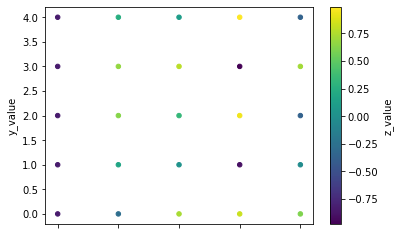

In [8]:
df.plot.scatter(x='x_value', y='y_value', c='z_value', colormap='viridis');

Next we are gonna set the size of our resolution

In [9]:
dx, dy = 0.05, 0.05

Next we are going to generate values for three dimentional lines

In [16]:
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

In [18]:
!head ../skills_building/practice_data/actualbathy.csv

head: cannot open '../skills_building/practice_data/actualbathy.csv' for reading: No such file or directory


In [46]:
y2=yy.flatten()
print(y2)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [47]:
data = {'x':x2,
       'y':y2,
       'z':z2}
df=pd.DataFrame(data)
df

,x,y,z
0,0,0,-0.839072
1,1,0,-0.275364
2,2,0,0.735597
3,3,0,0.830675
4,4,0,0.610088
5,0,1,-0.839072
6,1,1,0.180380
7,2,1,0.035253
8,3,1,-0.898366
9,4,1,-0.027743


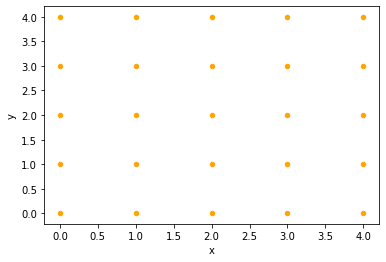

In [50]:
df.plot(kind ='scatter',x='x',y='y',color='orange')
plt.savefig('Q4plot.png')

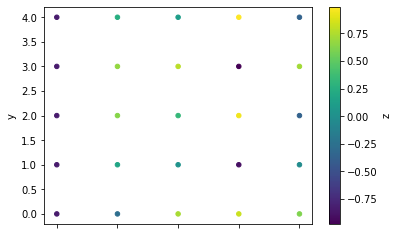

In [52]:
df.plot.scatter(x='x',y='y',c='z', colormap='viridis')
plt.savefig('q5plot.png')

In [53]:
!head -5 actualbathy.csv

"EAST","NORTH","ELEVATION"
-35,-25,9.32108797751026
-35,-24.75,9.35678729763397
-35,-24.5,9.39248661775767
-35,-24.25,9.42818593788138


The next step is to open our data in the DataFreame

In [25]:
df_bathy = pd.read_csv('actualbathy.csv')
df_bathy

,EAST,NORTH,ELEVATION
0,-35.0,-25.00,9.321088
1,-35.0,-24.75,9.356787
2,-35.0,-24.50,9.392487
3,-35.0,-24.25,9.428186
4,-35.0,-24.00,9.504512
5,-35.0,-23.75,9.448359
6,-35.0,-23.50,9.429514
7,-35.0,-23.25,9.426695
8,-35.0,-23.00,9.418625
9,-35.0,-22.75,9.467676


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
x_value    25 non-null float64
y_value    25 non-null float64
z_value    25 non-null float64
dtypes: float64(3)
memory usage: 728.0 bytes


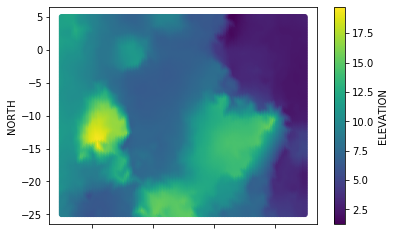

In [27]:
df_bathy.plot.scatter(x='EAST', y='NORTH', c='ELEVATION', colormap='viridis');
plt.savefig('Q9plot.png')

In [28]:
eastlist = list(df_bathy['EAST']),
northlist = list(df_bathy['NORTH']),
elevationlist = list(df_bathy['ELEVATION'])

In [29]:
df = pd.DataFrame.from_dict(np.array([X,Y,Z]).T)
df.columns = ['x_value','y_value','z_value']
df['z_value'] = pd.to_numeric(df['z_value'])
df.head()

,x_value,y_value,z_value
0,0.0,0.0,-0.839072
1,1.0,0.0,-0.275364
2,2.0,0.0,0.735597
3,3.0,0.0,0.830675
4,4.0,0.0,0.610088


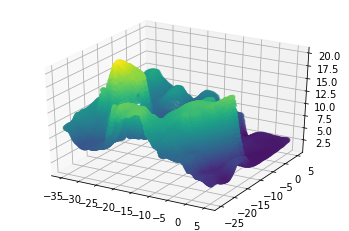

In [30]:
ax = plt.axes(projection='3d')

xdata= eastlist
ydata= northlist
zdata= elevationlist
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');
plt.savefig('A10plot.png')

In [ ]:
df_covis_location_bar= pd.read_csv('actualbathy.csv')
df_bathy

In [31]:
1+1

2